### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

Сравните скорость работы вашей функции со встроенной библиотечной реализацией, как тут [Работа со случайными величинами.](https://miptstats.github.io/courses/python/07_random.html)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [118]:
n = 6

Matrix = np.random.random((n, n))
cov = np.dot(Matrix.T,Matrix)



A = np.linalg.cholesky(cov)
z = sts.norm().rvs(size = (n, 1000000)) 
x = np.dot(A, z) + np.var(z)


print('Получившийся вектор \n\n',x)
print('Проверим ков. матрицу')
print(cov, "\n\n", np.cov(x))

Получившийся вектор 

 [[ 2.49257084  1.6863674  -0.64928085 ...  3.75440427  2.70223362
  -0.18501739]
 [ 2.64918885  2.37369192  1.47429411 ...  4.32812024  2.52639124
   0.28920876]
 [ 2.01848151  2.62678944  1.06750112 ...  2.78018473  3.27057214
   1.27063293]
 [ 1.59211555  0.27074689  1.48782665 ...  1.81783394  1.16319228
   0.36213703]
 [ 2.46319483  1.44970228  1.60554188 ...  4.17930955  2.17589173
  -0.54193167]
 [ 1.40066889  1.51856828  2.78927882 ...  1.86137057  1.46007342
   0.84181687]]
Проверим ков. матрицу
[[2.0166615  2.13433104 1.42376653 0.77090392 1.65252192 0.66508146]
 [2.13433104 2.85590193 1.73324291 0.97731751 2.08874115 1.33188409]
 [1.42376653 1.73324291 1.51335569 0.58899229 1.20244048 0.84712449]
 [0.77090392 0.97731751 0.58899229 0.6547459  0.91849541 0.57657826]
 [1.65252192 2.08874115 1.20244048 0.91849541 2.41351753 0.70123804]
 [0.66508146 1.33188409 0.84712449 0.57657826 0.70123804 1.21314704]] 

 [[2.02274153 2.14206618 1.42673854 0.77349346 1.66

### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:






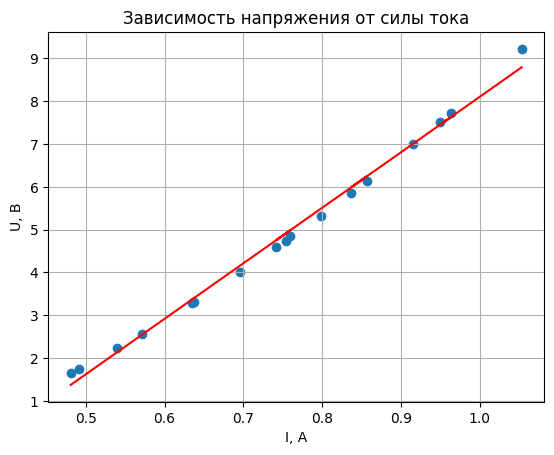

y = k*x + b, где k = 12.968170249486748 b = -4.865082279895808


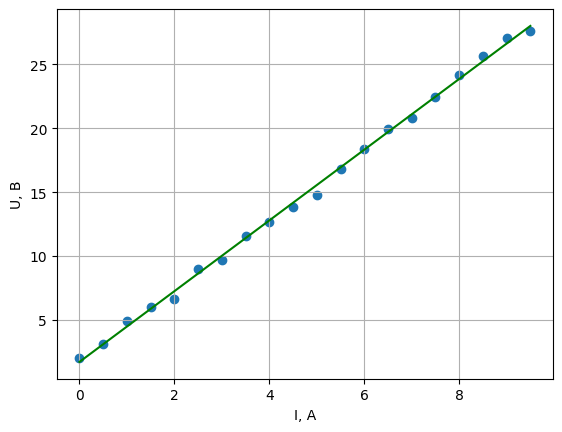

y = k*x + b, где k = 2.7662521596597056 b = 1.7197461690714149


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset
from scipy.optimize import curve_fit

# данные из лабораторной работы
data = pd.read_excel("data.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

value, eps = curve_fit(lambda x, a, b: a*x + b,I,U)

y = value[0]*I + value[1]
fig, axes = plt.subplots(1)
axes = plt.xlabel("I, А")
axes = plt.ylabel("U, В")
axes = plt.grid()
plt.scatter(I,U)
axes = plt.title("Зависимость напряжения от силы тока")
plt.plot(I,y, "r")
plt.show()

print("y = k*x + b, где k =", value[0], "b =", value[1])



# создание прямой с шумом

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

fig, axes = plt.subplots(1)
axes = plt.scatter(xs, ys)
axes = plt.xlabel("I, А")
axes = plt.ylabel("U, В")
axes = plt.grid()

value_s, eps_s = curve_fit(lambda x, a, b: a*x + b,xs,ys)
axes = plt.plot(xs, xs*value_s[0] + value_s[1], "g")
plt.show()
print("y = k*x + b, где k =", value_s[0], "b =", value_s[1])


### 3. Правдоподобие для гауссовой вероятностной модели.

Пусть дана выборка точек на прямой $\left\{x_i\right\}$.

Максимизируйте правдоподобие (или его логарифм) в гауссовой вероятностной модели:
$$
\prod_i p\left(x_i\right) \rightarrow \max _{\mu, \sigma} \quad p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} .
$$



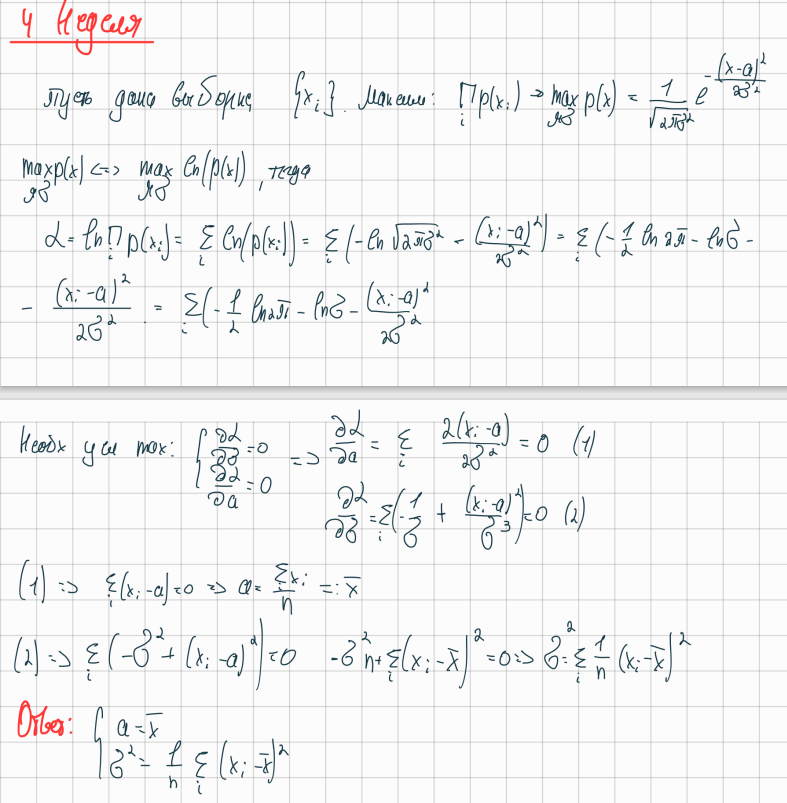